In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df=pd.read_csv('data-export (1).csv', lineterminator='\n')
df.head(10)


,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,\r
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count\r
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402\r
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147\r
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069\r
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044\r
5,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001\r
6,Organic Social,2024041721,160,206,103,59.31553398058250,0.64375,4.694174757281550,0.5,967\r
7,Organic Social,2024050119,160,219,110,40.31506849315070,0.6875,4.63013698630137,0.502283105022831,1014\r
8,Direct,2024041622,158,192,94,39.020833333333300,0.5949367088607590,4.057291666666670,0.4895833333333330,779\r
9,Organic Social,2024041321,152,178,96,30.48876404494380,0.631578947368421,5.056179775280900,0.5393258426966290,900\r


###### first we have to remove the unamed like columns 


In [106]:
df.columns= df.iloc[0]
# we have make the 0 index as the column and now drop the index 0 from table

In [107]:
df=df.drop(index=0).reset_index(drop=True)
## The 0 index row have been droped and index still starts with 0
df.head(1)

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count\r
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402\r


###### Changing the columns name 

In [108]:
df.columns=["Channel group", "DateHour","Users","Session","Engaged sessions","Average engagement time per session","Engaged sessions per user","Events per session","Engagement rate","Event count"]
df.head()

,Channel group,DateHour,Users,Session,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402\r
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147\r
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069\r
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044\r
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001\r


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Channel group                        3182 non-null   object
 1   DateHour                             3182 non-null   object
 2   Users                                3182 non-null   object
 3   Session                              3182 non-null   object
 4   Engaged sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged sessions per user            3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


###### Since all the columns are of the string formet(object) so we have to convert most of data type

In [110]:
df['DateHour']=pd.to_datetime(df['DateHour'],format="%Y%m%d%H", errors='coerce')
## chaning the data type to datetime
df.head(1)

,Channel group,DateHour,Users,Session,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024-04-16 23:00:00,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402\r


In [ ]:
numerical_cols=df.columns.drop(["Channel group","DateHour"])
# except these columns convert other to the numeric datatype
df[numerical_cols]=df[numerical_cols].apply(pd.to_numeric,errors='coerce')
df['Hours']= df["DateHour"].dt.hour

cleaned=df
cleaned


,Channel group,DateHour,Users,Session,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hours
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
...,...,...,...,...,...,...,...,...,...,...,...
3177,Unassigned,2024-04-28 06:00:00,0,1,0,0.000000,0.000000,2.000000,0.000000,2,6
3178,Unassigned,2024-04-30 05:00:00,0,1,0,0.000000,0.000000,2.000000,0.000000,2,5
3179,Unassigned,2024-04-30 06:00:00,0,1,0,0.000000,0.000000,2.000000,0.000000,2,6
3180,Unassigned,2024-05-01 05:00:00,0,1,0,0.000000,0.000000,2.000000,0.000000,2,5


In [112]:
cleaned=pd.DataFrame(cleaned)
df.to_csv("cleanedwebsite.csv", index=False,encoding='utf-8')

print("Data saved successfully.")

Data saved successfully.


In [113]:
df.head(1)

,Channel group,DateHour,Users,Session,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hours
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.48,1402,23


In [114]:
df.describe()

,DateHour,Users,Session,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hours
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


###### Checking for the null and duplicate values

In [115]:
df.isna().sum()

Channel group                          0
DateHour                               0
Users                                  0
Session                                0
Engaged sessions                       0
Average engagement time per session    0
Engaged sessions per user              0
Events per session                     0
Engagement rate                        0
Event count                            0
Hours                                  0
dtype: int64

In [116]:
df.sample(10)

,Channel group,DateHour,Users,Session,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hours
1861,Organic Social,2024-04-20 07:00:00,34,52,24,30.884615,0.705882,4.846154,0.461538,252,7
1406,Direct,2024-04-22 16:00:00,45,57,26,37.982456,0.577778,3.649123,0.456140,208,16
340,Organic Social,2024-04-22 21:00:00,77,94,56,48.595745,0.727273,6.234043,0.595745,586,21
2864,Organic Video,2024-04-14 23:00:00,1,1,1,648.000000,1.000000,8.000000,1.000000,8,23
1389,Referral,2024-04-16 10:00:00,46,57,27,29.666667,0.586957,4.070175,0.473684,232,10
1718,Direct,2024-04-24 10:00:00,38,50,25,43.860000,0.657895,3.860000,0.500000,193,10
205,Organic Search,2024-04-18 21:00:00,87,107,53,43.635514,0.609195,3.439252,0.495327,368,21
1969,Referral,2024-04-18 02:00:00,31,34,23,197.117647,0.741935,5.470588,0.676471,186,2
1360,Direct,2024-04-22 13:00:00,46,61,28,42.360656,0.608696,3.737705,0.459016,228,13
637,Organic Social,2024-04-06 15:00:00,65,78,41,74.974359,0.630769,5.038462,0.525641,393,15


In [ ]:
df.duplicated().sum()




np.int64(0)

###### Key Matrics claculation

In [157]:
total_users=df['Users'].sum()
total_session=df['Session'].sum()
overall_engagement_rate=(df['Engagement rate'].mean())*100
total_events=df['Event count'].sum()
avaerage_session_duration=df['Hours'].mean()
overall_events_per_session = df['Event count'].sum() / df['Session'].sum()
event_per_session=df['Event count'] / df['Session']
event_per_session


0       4.673333
1       4.295880
2       4.587983
3       4.078125
4       4.529412
          ...   
3177    2.000000
3178    2.000000
3179    2.000000
3180    2.000000
3181    2.000000
Length: 3182, dtype: float64

In [155]:
print(f"total_user:{total_users}")
print(f"total_session:{total_session}")
print(f"total_events:{total_events}")
print(f"overall engagement rate:{overall_engagement_rate}")
print(f"average_session_duartiom:{avaerage_session_duration}")
print(f"Overall Events per Session: {overall_events_per_session:.2f}")

total_user:133440
total_session:162895
total_events:770911
overall engagement rate:50.339625934482015
average_session_duartiom:11.807039597737273
Overall Events per Session: 4.73


###### Sessions and user over time

###### What pattern or trends can you observe in website sesiion and users over time                  ------ ie in whcih time the most of the session and user were active

In [118]:
sns.set(style='whitegrid')

Text(0.5, 1.0, 'Session and user over hours')

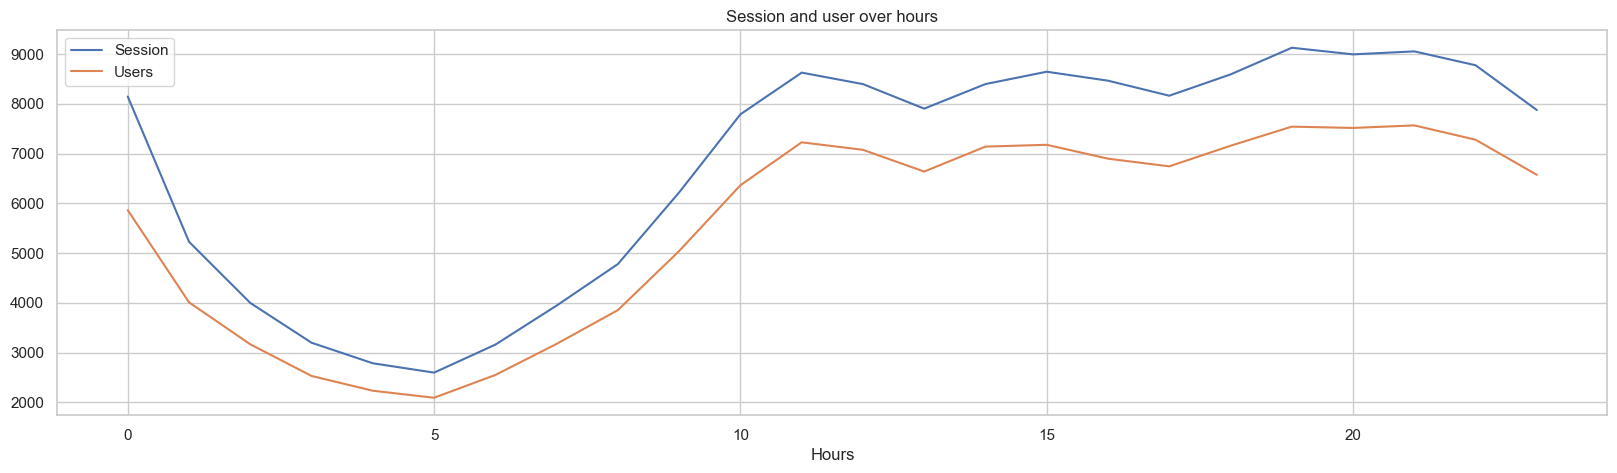

In [119]:
plt.figure(figsize=(20,5))
data=df.groupby("Hours")[["Session","Users"]].sum().plot(ax=plt.gca())
plt.title("Session and user over hours")


###### This tells at which time in a day most of the session and user are active-----Most sessions and users are active during afternoon to early evening hours

Text(0.5, 1.0, 'Session and user over dates')

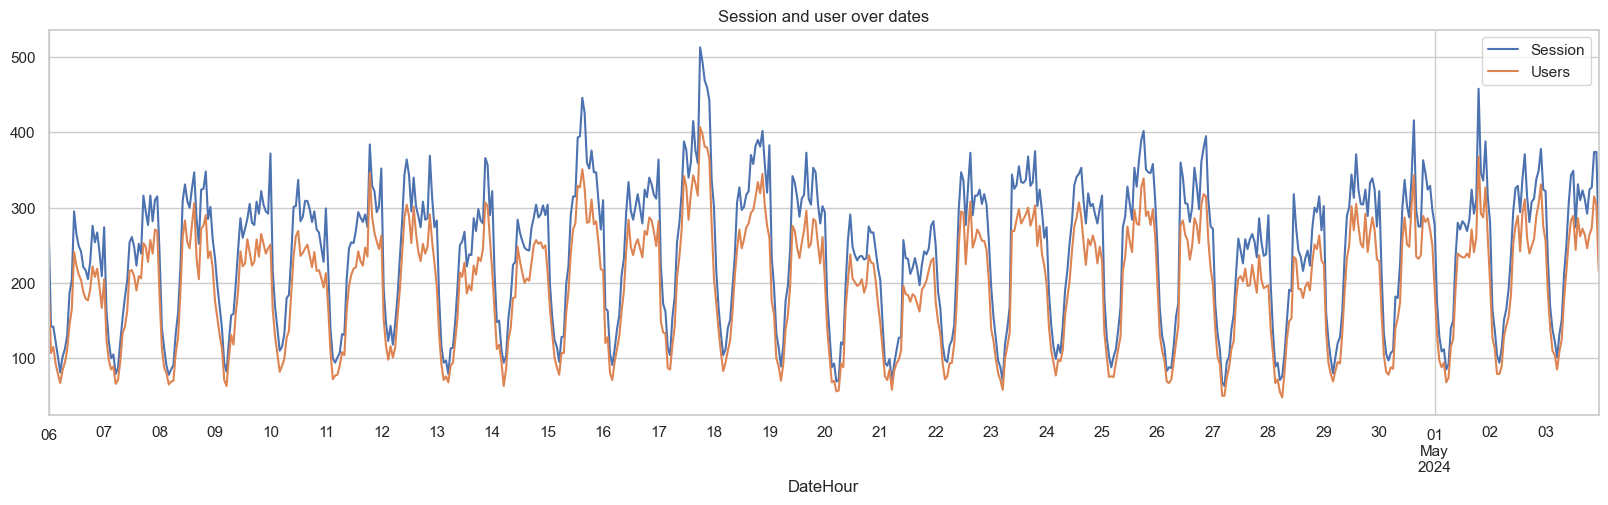

In [120]:
plt.figure(figsize=(20,5))
data=df.groupby("DateHour")[["Session","Users"]].sum().plot(ax=plt.gca())
plt.title("Session and user over dates")



###### this chart shows that on certain dates (like around May 17 and May 30), there was a surge in user and session activity.

In [121]:
df.head()

,Channel group,DateHour,Users,Session,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hours
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


###### @-Which marketing channel brought the highest number of users on the website

In [150]:
df.groupby("Channel group")["Users"].sum()




Channel group
Direct            30042
Email                 2
Organic Search    28387
Organic Social    47572
Organic Video       123
Referral          26774
Unassigned          540
Name: Users, dtype: int64

C:\Users\Prathamesh Upreti\AppData\Local\Temp\ipykernel_12744\356121815.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Channel group',y='Users', estimator=np.sum, palette="viridis")


Text(0.5, 1.0, 'Total user by channel')

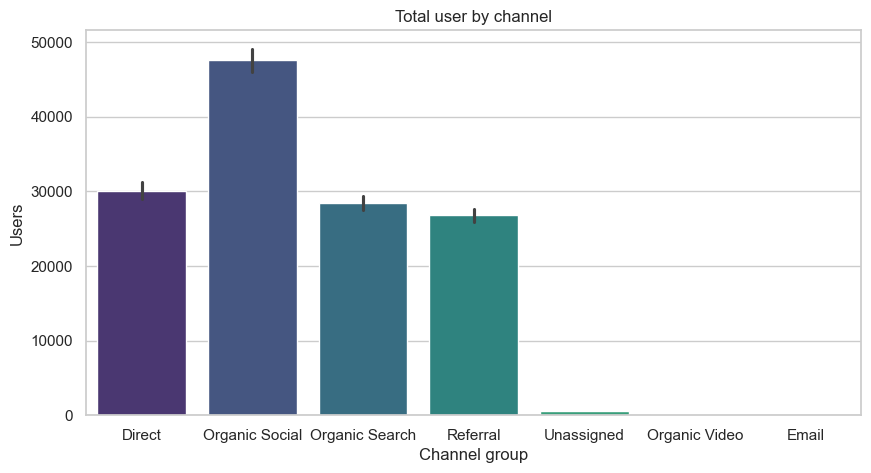

In [123]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Channel group',y='Users', estimator=np.sum, palette="viridis")
plt.title("Total user by channel")

###### so we can say the orgamic social channel is briging most of the user in the website and email channel is briging the least user in the website

In [124]:
df.sample()

,Channel group,DateHour,Users,Session,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hours
1683,Organic Search,2024-04-06 21:00:00,39,45,31,48.066667,0.794872,4.2,0.688889,189,21


###### Average engagement time by channel ie which channel is able to keep the user enaged

In [125]:
df.groupby("Channel group")["Average engagement time per session"].mean()

Channel group
Direct             45.533104
Email              72.666667
Organic Search     47.005018
Organic Social     53.493681
Organic Video     180.360000
Referral           92.660842
Unassigned         78.957923
Name: Average engagement time per session, dtype: float64

C:\Users\Prathamesh Upreti\AppData\Local\Temp\ipykernel_12744\3296509555.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df ,x='Channel group', y='Average engagement time per session', estimator=np.mean,palette='magma')


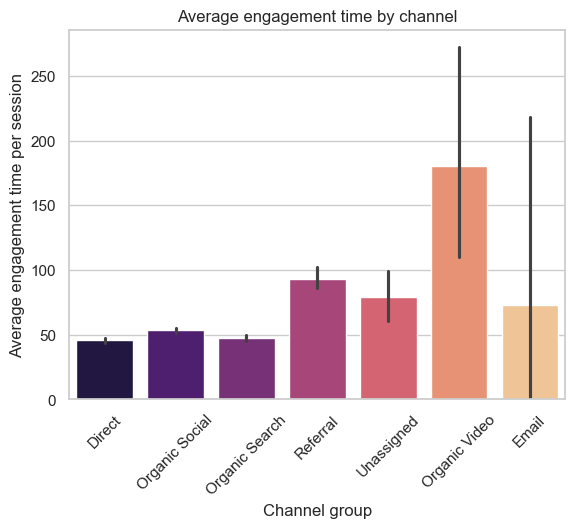

In [126]:
plt.Figure(figsize=(8,5))

sns.barplot(data=df ,x='Channel group', y='Average engagement time per session', estimator=np.mean,palette='magma')
plt.title("Average engagement time by channel")
plt.xticks(rotation=45)
plt.show()

In [127]:
df.sample(4)

,Channel group,DateHour,Users,Session,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hours
285,Direct,2024-04-17 18:00:00,80,96,48,67.072917,0.600000,4.208333,0.500000,404,18
2396,Direct,2024-04-13 05:00:00,19,23,12,51.521739,0.631579,4.478261,0.521739,103,5
2769,Unassigned,2024-04-18 18:00:00,2,2,0,158.000000,0.000000,5.000000,0.000000,10,18
893,Direct,2024-04-10 18:00:00,57,72,29,80.208333,0.508772,4.430556,0.402778,319,18


###### How does enganement rate varie acroess diffrent channel

C:\Users\Prathamesh Upreti\AppData\Local\Temp\ipykernel_12744\868435227.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Channel group',y='Engagement rate',palette='coolwarm')


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Direct'),
  Text(1, 0, 'Organic Social'),
  Text(2, 0, 'Organic Search'),
  Text(3, 0, 'Referral'),
  Text(4, 0, 'Unassigned'),
  Text(5, 0, 'Organic Video'),
  Text(6, 0, 'Email')])

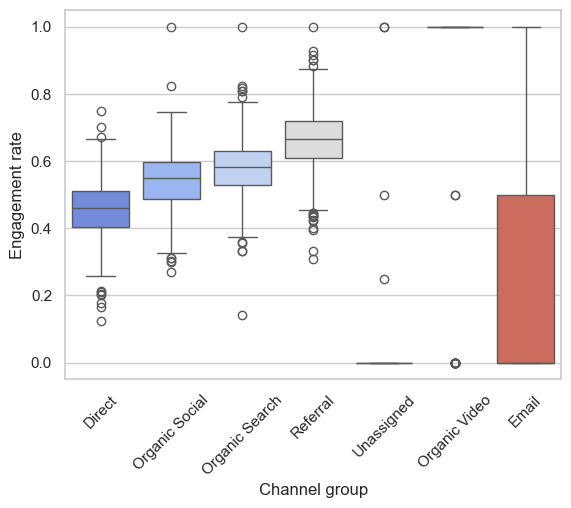

In [159]:
plt.Figure(figsize=(8,5))
sns.boxplot(data=df, x='Channel group',y='Engagement rate',palette='coolwarm')
plt.xticks(rotation=45)

###### This means people coming from the refrral channels have the more engament rate then the other channels

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Direct'),
  Text(1, 0, 'Organic Social'),
  Text(2, 0, 'Organic Search'),
  Text(3, 0, 'Referral'),
  Text(4, 0, 'Unassigned'),
  Text(5, 0, 'Organic Video'),
  Text(6, 0, 'Email')])

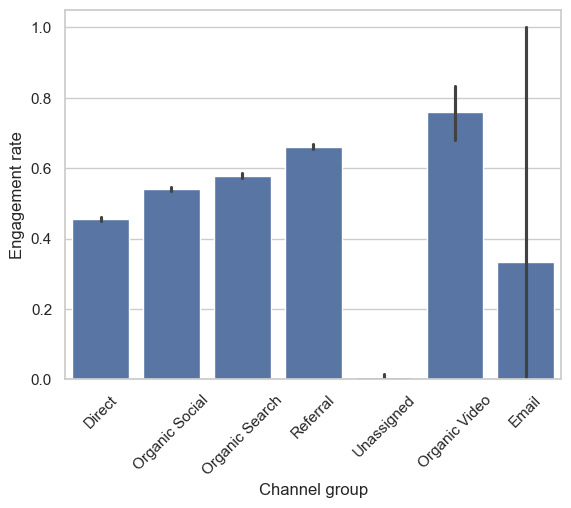

In [162]:
plt.Figure(figsize=(8,5))
sns.barplot(data=df, x='Channel group',y='Engagement rate')
plt.xticks(rotation=45)

In [129]:
df.sample(5)

,Channel group,DateHour,Users,Session,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hours
1748,Direct,2024-04-20 18:00:00,37,47,20,18.234043,0.540541,3.382979,0.425532,159,18
1331,Organic Search,2024-04-10 23:00:00,47,53,33,38.377358,0.702128,5.245283,0.622642,278,23
141,Organic Social,2024-04-30 22:00:00,96,115,65,59.034783,0.677083,5.530435,0.565217,636,22
2612,Referral,2024-04-06 03:00:00,13,15,11,144.466667,0.846154,9.600000,0.733333,144,3
1348,Referral,2024-04-17 22:00:00,47,59,40,65.000000,0.851064,6.508475,0.677966,384,22


###### engaged channels vs non enggaged channel

###### ie which channels is bringing the most engaged user and non engaged user

In [130]:
#### since we have the engaged session but no non engaged channel so 1st create the non engaged seesion

session_df=df.groupby('Channel group')[["Session","Engaged sessions"]].sum().reset_index()
session_df

,Channel group,Session,Engaged sessions
0,Direct,37203,17243
1,Email,3,1
2,Organic Search,33372,19425
3,Organic Social,60627,32697
4,Organic Video,141,109
5,Referral,30990,20653
6,Unassigned,559,4


###### melt function It helps you turn columns into rows, making your data easier to analyze or visualize.

In [138]:
session_df["Non-engaged"]= session_df["Session"]-session_df["Engaged sessions"]
session_df["Non-engaged"]
session_df_melted= session_df.melt(id_vars="Channel group",value_vars=["Engaged sessions","Non-engaged"])
session_df_melted

,Channel group,variable,value
0,Direct,Engaged sessions,17243
1,Email,Engaged sessions,1
2,Organic Search,Engaged sessions,19425
3,Organic Social,Engaged sessions,32697
4,Organic Video,Engaged sessions,109
5,Referral,Engaged sessions,20653
6,Unassigned,Engaged sessions,4
7,Direct,Non-engaged,19960
8,Email,Non-engaged,2
9,Organic Search,Non-engaged,13947


<Axes: xlabel='Channel group', ylabel='value'>

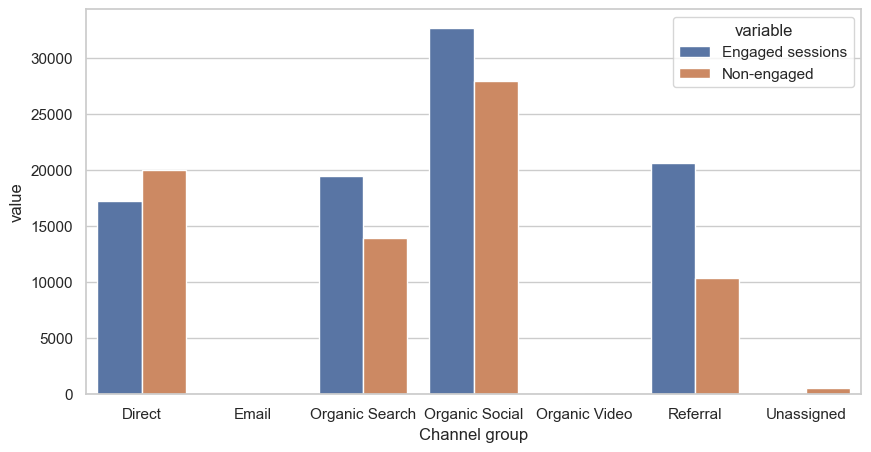

In [132]:
plt.figure(figsize=(10,5))
sns.barplot(data=session_df_melted,x="Channel group",y="value", hue="variable")

###### Organic Social has the highest total sessions overall (both engaged and non-engaged).
###### → This means social platforms are bringing the most users.

In [133]:
df.sample(5)

,Channel group,DateHour,Users,Session,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hours
2908,Organic Video,2024-04-26 10:00:00,1,1,1,50.000000,1.000000,14.000000,1.000000,14,10
2746,Unassigned,2024-04-12 15:00:00,2,2,0,35.000000,0.000000,2.500000,0.000000,5,15
2494,Referral,2024-04-27 03:00:00,17,18,14,80.666667,0.823529,7.166667,0.777778,129,3
508,Direct,2024-04-12 14:00:00,69,78,40,37.897436,0.579710,4.384615,0.512821,342,14
2745,Unassigned,2024-04-12 11:00:00,2,2,0,5.000000,0.000000,1.500000,0.000000,3,11


###### At what hour of the day does each channel drives the most traffic?

In [134]:
most_traffic=df.groupby(['Hours','Channel group'])["Session"].sum().unstack().fillna(0)

<Axes: xlabel='Channel group', ylabel='Hours'>

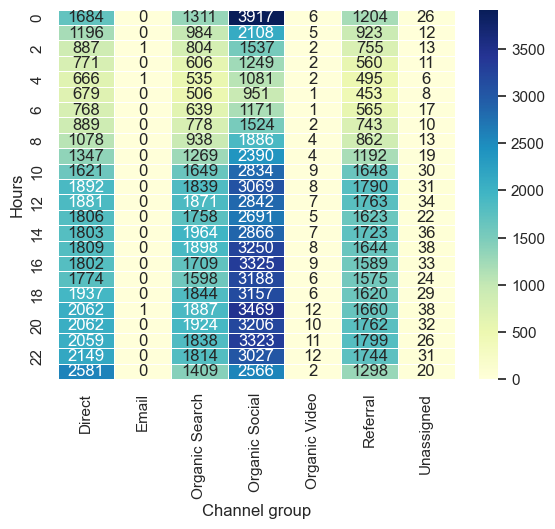

In [135]:
plt.Figure(figsize=(10,5))
sns.heatmap(data=most_traffic,cmap="YlGnBu",linewidths=.5,annot=True,fmt='.0f')

In [136]:
df  

,Channel group,DateHour,Users,Session,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hours
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
...,...,...,...,...,...,...,...,...,...,...,...
3177,Unassigned,2024-04-28 06:00:00,0,1,0,0.000000,0.000000,2.000000,0.000000,2,6
3178,Unassigned,2024-04-30 05:00:00,0,1,0,0.000000,0.000000,2.000000,0.000000,2,5
3179,Unassigned,2024-04-30 06:00:00,0,1,0,0.000000,0.000000,2.000000,0.000000,2,6
3180,Unassigned,2024-05-01 05:00:00,0,1,0,0.000000,0.000000,2.000000,0.000000,2,5


In [146]:
sessions_by_channel = df.groupby('Channel group')['Session'].sum().reset_index()

sessions_by_channel 

,Channel group,Session
0,Direct,37203
1,Email,3
2,Organic Search,33372
3,Organic Social,60627
4,Organic Video,141
5,Referral,30990
6,Unassigned,559


<Axes: xlabel='Channel group', ylabel='Session'>

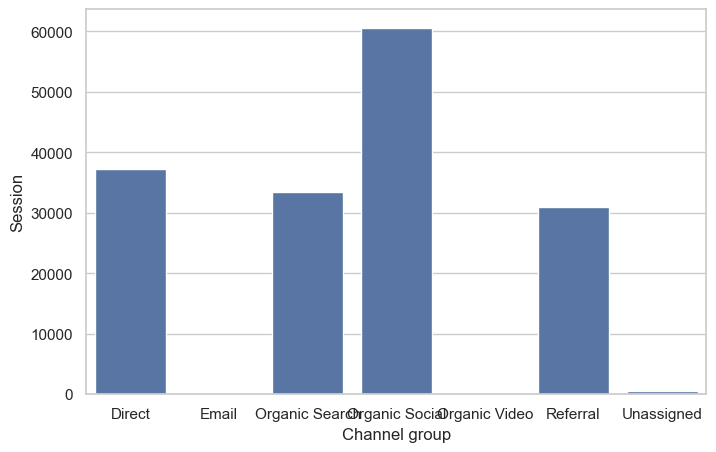

In [148]:
plt.figure(figsize=(8,5))
sns.barplot(data=sessions_by_channel, y='Session', x='Channel group')

In [163]:
df.head()

,Channel group,DateHour,Users,Session,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hours
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [166]:
df_plot=df.groupby('DateHour')[["Engagement rate","Session"]].mean().reset_index()

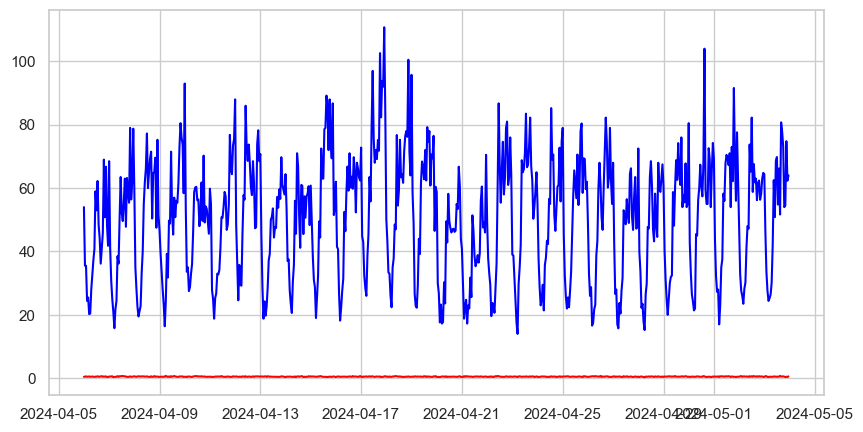

In [168]:
plt.figure(figsize=(10,5))
plt.plot(df_plot['DateHour'],df_plot['Engagement rate'],label='Engagement Rate', color='red')
plt.plot(df_plot['DateHour'],df_plot['Session'],label='Session', color='blue')